# PART 2
## Filter cells

Cells with low library size and low number of genes will be filtered out.

- **INPUT:**
    - ```counts.RData``` 
    - ```anno_cells.RData```
    - ```anno_samples.RData```
    - ```anno_genes.RData```
    
- **NOTES:**

    The '_ctf' ending in the file names stands for cell type filter.
    
- **OUTPUT:**

    -  ```counts_cf.RData``` 
    -  ```anno_cells_cf.RData``` 
    -  ```anno_samples_cf.RData``` 
    -  ```anno_genes_cf.RData``` 

In [1]:
library("ggplot2")

In [2]:
# paths
path_in<-'./outs/'
path_out <- './outs'

In [3]:
# load raw counts
load(paste0(path_in,"counts.RData"))
print(dim(counts))

[1] 50958  5348


In [4]:
# load cell annotation
load(paste0(path_in,"anno_cells.RData"))
rownames(anno_cells) <- anno_cells$cell_ID
print(str(anno_cells))

'data.frame':	5348 obs. of  35 variables:
 $ sample_ID                                                                : chr  "Pre_P1" "Pre_P1" "Pre_P1" "Pre_P1" ...
 $ index                                                                    : chr  "A10_P3_M11" "A11_P1_M11" "A11_P3_M11" "A11_P4_M11" ...
 $ orig.ident                                                               : chr  "A10" "A11" "A11" "A11" ...
 $ nCount_RNA                                                               : num  409232 357030 360531 384902 155214 ...
 $ nFeature_RNA                                                             : int  3274 2621 3118 4335 2945 3979 2034 3710 3846 4342 ...
 $ sample                                                                   : chr  "Pre_P1" "Pre_P1" "Pre_P1" "Pre_P1" ...
 $ treatment_response                                                       : chr  "Responder" "Responder" "Responder" "Responder" ...
 $ treatment                                                        

In [5]:
# load sample annotation
load(paste0(path_in,"anno_samples.RData"))
print(str(anno_samples))

'data.frame':	19 obs. of  17 variables:
 $ patient_ID                                                               : chr  "P1" "P12" "P15" "P2" ...
 $ sample_ID                                                                : chr  "Pre_P1" "Pre_P12" "Pre_P15" "Pre_P2" ...
 $ response_status                                                          : chr  "R" "NR" "NR" "NR" ...
 $ sampling_time                                                            : chr  "pre" "pre" "pre" "pre" ...
 $ gender                                                                   : chr  "M" "M" "M" "M" ...
 $ age                                                                      : int  49 68 72 75 64 73 74 72 62 67 ...
 $ therapy                                                                  : chr  "CTLA4 (baseline); PD1 (post I and II)" "PD1" "PD1" "PD1" ...
 $ clinical_response                                                        : Ord.factor w/ 4 levels "response"<"no response"<..: 4 2 2 2 3 1 2 

In [6]:
# load gene annotation
load(paste0(path_in,"anno_genes.RData"))
print(str(anno_genes))

'data.frame':	50958 obs. of  10 variables:
 $ gene_symbol              : chr  "TSPAN6" "TNMD" "DPM1" "SCYL3" ...
 $ vst_mean                 : num  0.1874 0.0254 25.1239 11.7653 12.0984 ...
 $ vst_variance             : num  55.62 1.71 5881.65 4097.14 4653.66 ...
 $ vst_variance_expected    : num  15.66 1.13 9646 3859.3 3994.57 ...
 $ vst_variance_standardized: num  2.95 1.52 0.61 1.06 1.16 ...
 $ vst_variable             : chr  "True" "False" "False" "False" ...
 $ highly_variable          : chr  "False" "False" "False" "True" ...
 $ means                    : num  0.001669 0.000333 0.163605 0.073268 0.074602 ...
 $ dispersions              : num  0.179 -0.664 0.186 0.365 0.274 ...
 $ dispersions_norm         : num  0.899 0.14 -0.38 1.067 0.984 ...
NULL


### Process data

In [7]:
# check whether the cell IDs are the same in the counts and cell annotation files
cell_ID_overlap <- intersect(colnames(counts)
                             ,anno_cells$cell_ID)
print("str(cell_ID_overlap)")
print(str(cell_ID_overlap))

[1] "str(cell_ID_overlap)"
 chr [1:5348] "A10_P3_M11" "A11_P1_M11" "A11_P3_M11" "A11_P4_M11" ...
NULL


In [8]:
# print out cells that are present in the raw counts, but not in the intersection
print(str(colnames(counts)[!(colnames(counts) %in% cell_ID_overlap)]))

 chr(0) 
NULL


In [9]:
# print out cells that present in the cell annotation, but not in the intersection
print(str(anno_cells$cell_ID[!(anno_cells$cell_ID %in% cell_ID_overlap)]))

 chr(0) 
NULL


### filter

In [10]:
# filter cells by their presence in the cell annotation file
counts_cf <- counts[,anno_cells$cell_ID]
print("nr cell before filtering")
print(ncol(counts))
print("nr cell after filtering")
print(ncol(counts_cf))

[1] "nr cell before filtering"
[1] 5348
[1] "nr cell after filtering"
[1] 5348


In [11]:
# calculate total counts
anno_cells$total_counts_raw <- colSums(counts_cf)
# calculate percent mito counts
print("calculate fraction of mito counts")
anno_cells$frac_mito  <-  anno_cells$percent.mt
print(head(anno_cells$frac_mito))

[1] "calculate fraction of mito counts"
[1]  3.950207  2.631995  5.595626  2.226492 12.066306  2.262039


In [12]:
# calculate nr genes
anno_cells$nr_genes <- colSums(counts_cf != 0)

### visualization

In [13]:
#cell filter thresholds
anno_cells$counts_upper_threshold <- 10000
anno_cells$counts_lower_threshold <- 500
anno_cells$genes_lower_threshold <- 500

In [14]:
print(paste("counts_upper_threshold: <", anno_cells$counts_upper_threshold[1]))
print(paste("counts_lower_threshold: >",anno_cells$counts_lower_threshold[1]))
print(paste("genes_lower_threshold: >", anno_cells$genes_lower_threshold[1]))

[1] "counts_upper_threshold: < 10000"
[1] "counts_lower_threshold: > 500"
[1] "genes_lower_threshold: > 500"


In [15]:
anno_cells$counts_upper_filter <- anno_cells$total_counts_raw < anno_cells$counts_upper_threshold
anno_cells$counts_lower_filter <- anno_cells$total_counts_raw > anno_cells$counts_lower_threshold
anno_cells$genes_lower_filter <- anno_cells$nr_genes > anno_cells$genes_lower_threshold
anno_cells$cell_filter <- anno_cells$counts_upper_filter & anno_cells$counts_lower_filter & 
        anno_cells$genes_lower_filter

'data.frame':	5348 obs. of  2 variables:
 $ log10_lib_size: num  3.17 3.12 3.12 3.29 3.07 ...
 $ sample_ID     : chr  "Pre_P1" "Pre_P1" "Pre_P1" "Pre_P1" ...
NULL


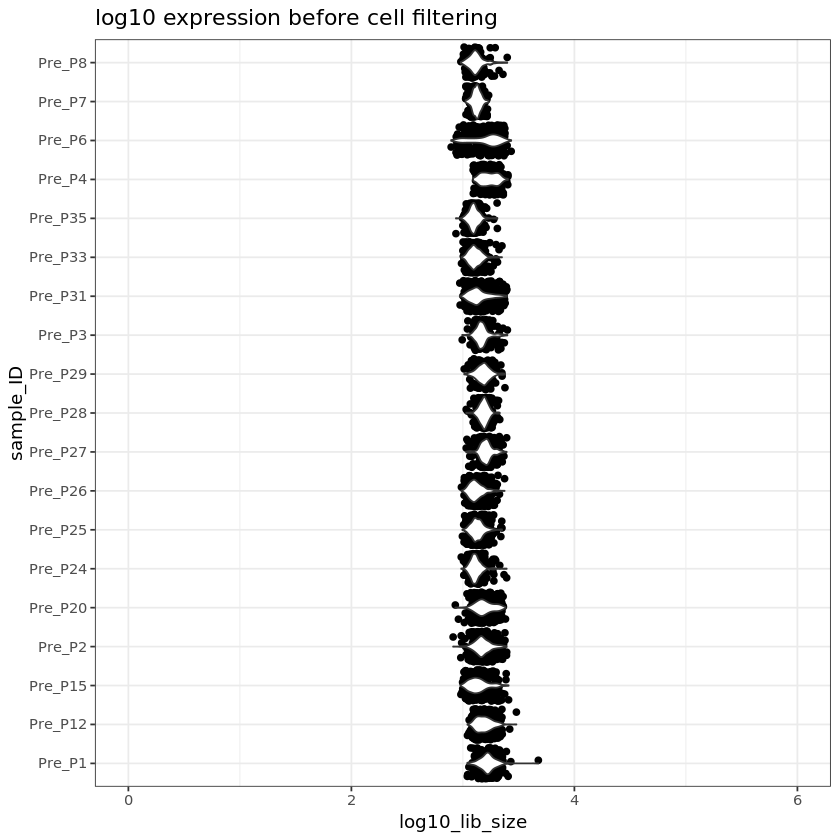

In [16]:
# visualize expression before any filtering
df <- data.frame(log10_lib_size = log10(anno_cells$total_counts_raw +1)
                 ,sample_ID = anno_cells$sample_ID
)
print(str(df))

print(ggplot(data = df
             ,aes(x = sample_ID
                  ,y = log10_lib_size
             )
) +
        geom_jitter(height = NULL) +
        geom_violin() + 
        ggtitle("log10 expression before cell filtering") +
        coord_flip() +
        ylim(c(0,6))+
        theme_bw()
)
rm(df)

Warning message:
“The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(level)` instead.”


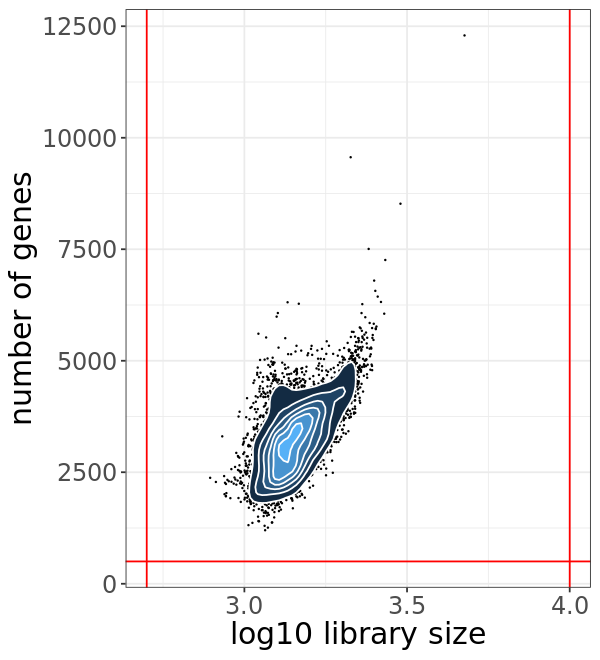

In [17]:
# plot log10 total counts vs nr genes
options(repr.plot.width = 5
       ,repr.plot.height = 5.5)

print(ggplot(data = anno_cells
             ,aes(x = log10(total_counts_raw +1)
                  ,y = nr_genes
             )
) +
      geom_point(size = 0.05) +
      stat_density_2d(aes(fill = ..level..), geom = "polygon", colour="white"
                     ,show.legend = FALSE) +
      geom_vline(xintercept = log10(c(anno_cells$counts_lower_threshold[1],anno_cells$counts_upper_threshold[1])+1)
                   ,col = "red") +
      geom_hline(yintercept = 500
                   ,col = "red") +
      theme_bw()+
      xlab("log10 library size")+
      ylab("number of genes")+
      theme(text = element_text(size = 18))  
)

In [18]:
#apply cell filters
anno_cells_cf <- anno_cells[anno_cells$cell_filter,]
print("before cell filtering:")
cat("dim(anno_cells)", dim(anno_cells),"\n")
print("after cell filtering:")
cat("dim(anno_cells_cf)", dim(anno_cells_cf),"\n")

[1] "before cell filtering:"
dim(anno_cells) 5348 45 
[1] "after cell filtering:"
dim(anno_cells_cf) 5348 45 


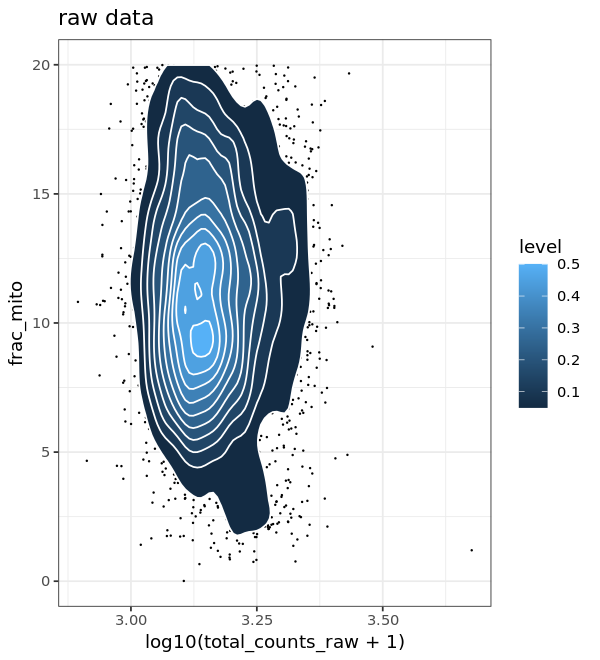

In [19]:
# plot log10 total counts vs fraction mito counts
print(ggplot(data = anno_cells_cf
             ,aes(x = log10(total_counts_raw +1)
                  ,y = frac_mito
             )
) +
        geom_point(size = 0.05) +
        stat_density_2d(aes(fill = ..level..), geom = "polygon", colour="white") +
        ggtitle("raw data")+
        theme_bw()
)

In [20]:
# save cell number in anno_samples
for(sample in unique(anno_cells$sample_ID)){
        
        my_anno <- anno_cells[anno_cells$sample_ID == sample,]
        my_anno_cf <- anno_cells_cf[anno_cells_cf$sample_ID == sample,]
        
        anno_samples$nr_cells_raw[anno_samples$sample_ID == sample] <- nrow(my_anno)
        anno_samples$nr_cells_cf[anno_samples$sample_ID == sample] <- nrow(my_anno_cf)
}
cat("anno_samples\n\n")
print(anno_samples)

anno_samples

   patient_ID sample_ID response_status sampling_time gender age
1          P1    Pre_P1               R           pre      M  49
7         P12   Pre_P12              NR           pre      M  68
11        P15   Pre_P15              NR           pre      M  72
17         P2    Pre_P2              NR           pre      M  75
18        P20   Pre_P20              NR           pre      F  64
24        P24   Pre_P24               R           pre      M  73
25        P25   Pre_P25              NR           pre      M  74
26        P26   Pre_P26               R           pre      M  72
27        P27   Pre_P27              NR           pre      F  62
28        P28   Pre_P28               R           pre      F  67
30        P29   Pre_P29               R           pre      M  79
31         P3    Pre_P3              NR           pre      F  83
35        P31   Pre_P31              NR           pre      M  52
36        P33   Pre_P33               R           pre      F  65
37        P

In [21]:
# subset counts
print("counts dim:")
print("before cell filtering:")
print(dim(counts_cf))
print("subset counts")
counts_cf <- counts_cf[,anno_cells_cf$cell_ID]
print("after cell filtering:")
print(dim(counts_cf))

[1] "counts dim:"
[1] "before cell filtering:"
[1] 50958  5348
[1] "subset counts"
[1] "after cell filtering:"
[1] 50958  5348


In [22]:
# visualize expression after cell filtering and before population size filtering
df <- data.frame(log10_lib_size = log10(anno_cells_cf$total_counts_raw +1)
                 ,sample_ID = anno_cells_cf$sample_ID
)
print(str(df))

'data.frame':	5348 obs. of  2 variables:
 $ log10_lib_size: num  3.17 3.12 3.12 3.29 3.07 ...
 $ sample_ID     : chr  "Pre_P1" "Pre_P1" "Pre_P1" "Pre_P1" ...
NULL


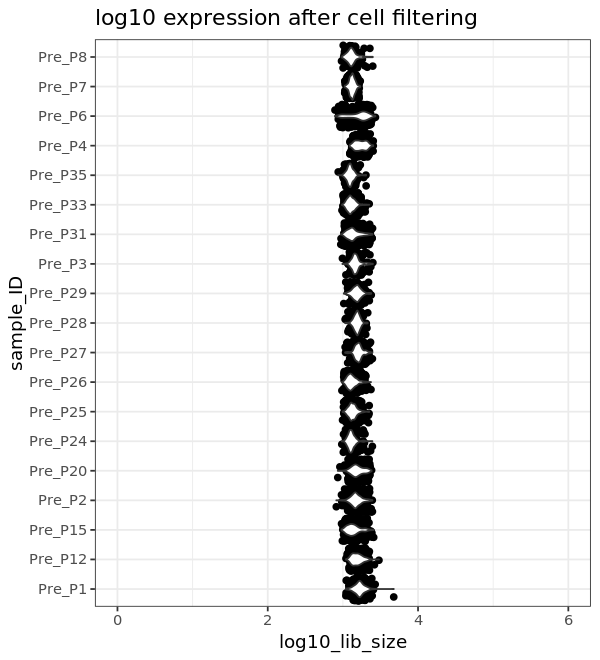

In [23]:
print(ggplot(data = df
             ,aes(x = sample_ID
                  ,y = log10_lib_size
             )
) +
        geom_jitter(height = NULL) +
        geom_violin() + 
        ggtitle("log10 expression after cell filtering") +
        coord_flip() +
        ylim(c(0,6))+
        theme_bw()
)
rm(df)

In [24]:
anno_samples_cf <- anno_samples

anno_genes_cf <- anno_genes

## Filter cell types

Cell types which have too few cells (less than 5 cells) per sample or are present in too few samples (less than in 30 samples) will be filtered out.

- **INPUT:**
    - ```counts_cf.RData``` 
    - ```anno_cells_cf.RData```
    - ```anno_samples_cf.RData```
    - ```anno_genes_cf.RData```
    - ```cell_relabelling.csv``` file containing unified cell type annotations. Stored in additional_input_files sub-directory.
    
- **NOTES:**

    The '_ctf' ending in the file names stands for cell type filter.
    
- **OUTPUT:**

    -  ```counts_cf_ctf.RData``` 
    -  ```anno_cells_cf_ctf.RData``` 
    -  ```anno_samples_cf_ctf.RData``` 
    -  ```anno_genes_cf_ctf.RData``` 

In [25]:
# thresholds ####
threshold_celltype_size <- 1 # cells per celltype
print(paste("Celltype size filter: each cell type in each sample should have at least", threshold_celltype_size, "cells."))

[1] "Celltype size filter: each cell type in each sample should have at least 1 cells."


In [26]:
threshold_nr_samples <-8 # nr of samples in which a cell type should be present
print(paste("Number of samples filter: each cell type should be present in at least", threshold_nr_samples, "samples."))

[1] "Number of samples filter: each cell type should be present in at least 8 samples."


In [27]:
# shape scheme for sample IDs
shape_sample <- c(1:length(unique(anno_cells_cf$sample_ID)))
names(shape_sample) <- unique(anno_cells_cf$sample_ID)
print(shape_sample)

 Pre_P1 Pre_P12 Pre_P15  Pre_P2 Pre_P20 Pre_P24 Pre_P25 Pre_P26 Pre_P27 Pre_P28 
      1       2       3       4       5       6       7       8       9      10 
Pre_P29  Pre_P3 Pre_P31 Pre_P33 Pre_P35  Pre_P4  Pre_P6  Pre_P7  Pre_P8 
     11      12      13      14      15      16      17      18      19 


In [28]:
# size scheme for sample IDs
size_sample <- sapply(rownames(anno_samples_cf),function(s){ifelse(anno_samples_cf[s,]$clinical_response == "no response", 3, 1)})
names(size_sample) <- anno_samples_cf$sample_ID
print(size_sample)

 Pre_P1 Pre_P12 Pre_P15  Pre_P2 Pre_P20 Pre_P24 Pre_P25 Pre_P26 Pre_P27 Pre_P28 
      1       3       3       3       1       1       3       1       3       1 
Pre_P29  Pre_P3 Pre_P31 Pre_P33 Pre_P35  Pre_P4  Pre_P6  Pre_P7  Pre_P8 
      1       3       3       1       1       1       3       1       1 


### filter


In [29]:
# store threshold values in the cell annotation file
anno_cells_cf$threshold_celltype_size <- threshold_celltype_size

In [30]:
# calculate celltype size
for(sample in unique(anno_cells_cf$sample_ID)){
        idx_sample <- anno_cells_cf$sample_ID == sample
        
        for(celltype in unique(anno_cells_cf$cell_type)){
                idx_celltype <- anno_cells_cf$cell_type == celltype
                
                idx_sample_celltype <- idx_sample & idx_celltype
                
                anno_cells_cf$celltype_size_cf[idx_sample_celltype] <- nrow(anno_cells_cf[idx_sample_celltype,])
        }
}

In [31]:
# calculate celltype size filter
anno_cells_cf$celltype_size_filter <- anno_cells_cf$celltype_size_cf >= anno_cells_cf$threshold_celltype_size

In [32]:
# visualize nr_samples vs log10_nr_cells before filtering
df <-unique(data.frame(sample_ID = anno_cells_cf$sample_ID
                       ,cell_type = anno_cells_cf$cell_type
                )
            )
print(str(df))
df$nr_cells <- sapply(1: nrow(df)
                      ,function(i){
                              my_sample <- df$sample_ID[i]
                              my_celltype <- df$cell_type[i]
                              nr_cells <- sum((anno_cells_cf$sample_ID == my_sample) & (anno_cells_cf$cell_type == my_celltype))
                              nr_cells
                      })
df$nr_samples <- sapply(1: nrow(df)
                        ,function(i){
                                my_celltype <- df$cell_type[i]
                                idx_celltype <- anno_cells_cf$cell_type == my_celltype
                                nr_samples <- length(unique(anno_cells_cf$sample_ID[idx_celltype]))
                                nr_samples
                        })

print(str(df))

'data.frame':	238 obs. of  2 variables:
 $ sample_ID: chr  "Pre_P1" "Pre_P1" "Pre_P1" "Pre_P1" ...
 $ cell_type: chr  "NK" "T CD8 naïve" "T helper" "Tfh" ...
NULL
'data.frame':	238 obs. of  4 variables:
 $ sample_ID : chr  "Pre_P1" "Pre_P1" "Pre_P1" "Pre_P1" ...
 $ cell_type : chr  "NK" "T CD8 naïve" "T helper" "Tfh" ...
 $ nr_cells  : int  18 174 5 1 3 4 5 6 9 2 ...
 $ nr_samples: int  16 10 19 19 18 14 18 19 19 18 ...
NULL


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's size values.”


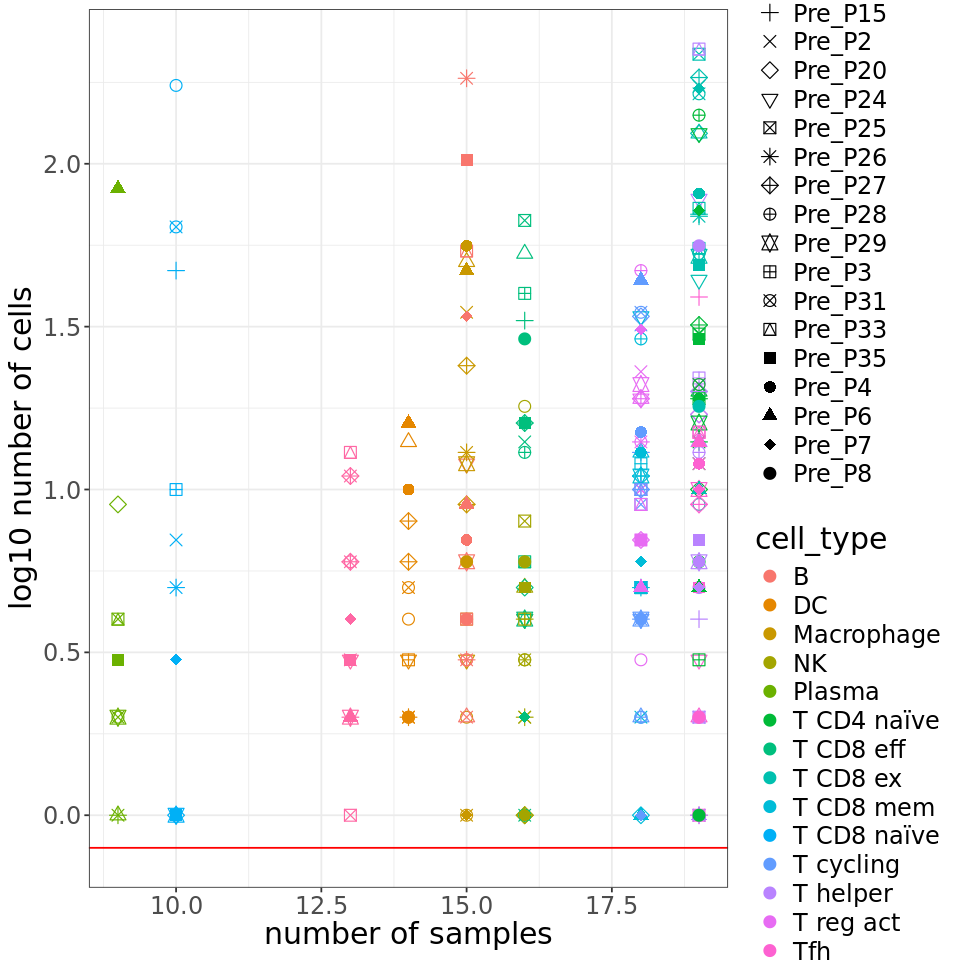

In [33]:
options(repr.plot.width = 8
       ,repr.plot.height = 8)

ggplot(data = df
       ,aes(x=nr_samples
            ,y=log10(nr_cells)
            ,color=cell_type
            ,shape=sample_ID
            ,size = sample_ID
            )
       )+
geom_point(size = 3)+
#scale_color_manual(values=color_celltype)+
scale_shape_manual(values=shape_sample)+
scale_size_manual(values=size_sample)+
geom_hline(yintercept = log10(threshold_celltype_size)-0.1
           ,color = "red")+
theme_bw()+
xlab("number of samples")+
ylab("log10 number of cells")+
theme(text = element_text(size = 18))

In [34]:
# apply celltype size filter
# filter cell annotation file
anno_cells_cf_ctf <- anno_cells_cf[anno_cells_cf$celltype_size_filter,]
print("number of cells before celltype size filtering:")
print(nrow(anno_cells_cf))
print("number of cells after celltype size filtering:")
print(nrow(anno_cells_cf_ctf))

[1] "number of cells before celltype size filtering:"
[1] 5348
[1] "number of cells after celltype size filtering:"
[1] 5348


In [35]:
# filer count matrix
counts_cf_ctf <- counts_cf[,anno_cells_cf$celltype_size_filter]
rm(counts_cf)

In [36]:
dim(counts_cf_ctf)

[1] 50958  5348

In [37]:
print("following cell types didn't pass the celltype size filter:")
for(sample in unique(anno_cells_cf_ctf$sample_ID)){
        print(sample)
        my_anno_cf <- anno_cells_cf[anno_cells_cf$sample_ID == sample,]
        print(table(my_anno_cf[!my_anno_cf$celltype_size_filter,"cell_type"]))
}

[1] "following cell types didn't pass the celltype size filter:"
[1] "Pre_P1"
< table of extent 0 >
[1] "Pre_P12"
< table of extent 0 >
[1] "Pre_P15"
< table of extent 0 >
[1] "Pre_P2"
< table of extent 0 >
[1] "Pre_P20"
< table of extent 0 >
[1] "Pre_P24"
< table of extent 0 >
[1] "Pre_P25"
< table of extent 0 >
[1] "Pre_P26"
< table of extent 0 >
[1] "Pre_P27"
< table of extent 0 >
[1] "Pre_P28"
< table of extent 0 >
[1] "Pre_P29"
< table of extent 0 >
[1] "Pre_P3"
< table of extent 0 >
[1] "Pre_P31"
< table of extent 0 >
[1] "Pre_P33"
< table of extent 0 >
[1] "Pre_P35"
< table of extent 0 >
[1] "Pre_P4"
< table of extent 0 >
[1] "Pre_P6"
< table of extent 0 >
[1] "Pre_P7"
< table of extent 0 >
[1] "Pre_P8"
< table of extent 0 >


### filter for being present in the minimun number of samples

In [38]:
# visualize nr_samples vs log10_nr_cells_all_samples before filtering
df <-unique(data.frame(cell_type = anno_cells_cf_ctf$cell_type))

df$nr_cells_in_all_samples <- sapply(1: nrow(df)
                      ,function(i){
                              my_celltype <- df$cell_type[i]
                              nr_cells <- sum(anno_cells_cf_ctf$cell_type == my_celltype)
                              nr_cells
                      })

df$nr_samples <- sapply(1: nrow(df)
                        ,function(i){
                                my_celltype <- df$cell_type[i]
                                idx_celltype <- anno_cells_cf_ctf$cell_type == my_celltype
                                nr_samples <- length(unique(anno_cells_cf_ctf$sample_ID[idx_celltype]))
                                nr_samples
                        })

rownames(df) <- df$cell_type



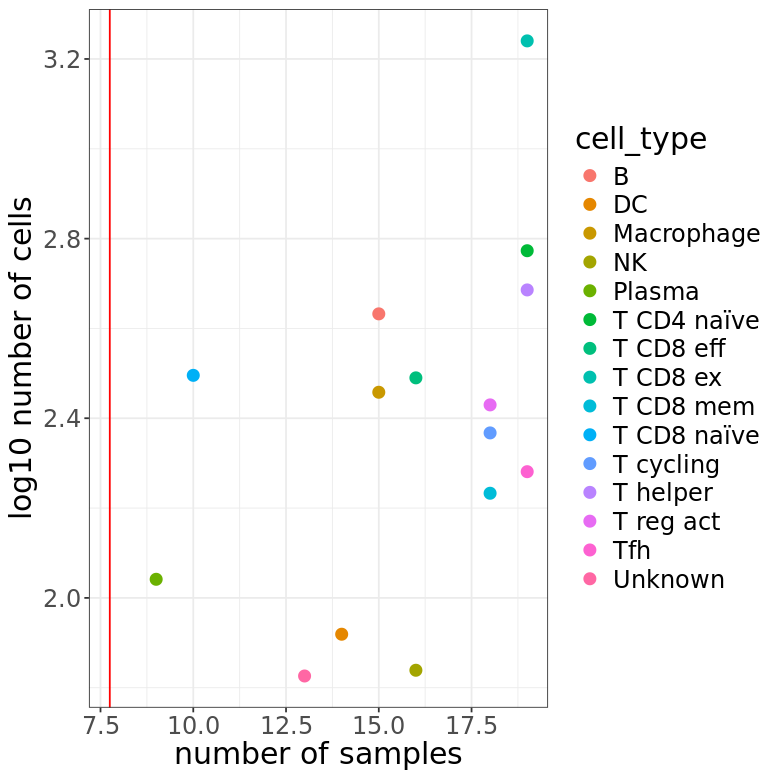

In [39]:
options(repr.plot.width = 6.5
       ,repr.plot.height = 6.5)

ggplot(data = df
       ,aes(x = nr_samples
            ,y = log10(nr_cells_in_all_samples)
            ,color = cell_type
       )
) +
geom_point(size = 3) +
#scale_color_manual(values = color_celltype) +
geom_vline(xintercept = threshold_nr_samples-0.25
           ,color = "red")+
theme_bw()+
ylab("log10 number of cells")+
xlab("number of samples")+
theme(text = element_text(size = 18))

### filter out underrepresented cell types

In [40]:
print(paste("filter out celltypes present in less than"
             ,threshold_nr_samples
             ,"samples"))
print("following celltypes didn' pass the filter")
bad_celltypes <- rownames(df)[df$nr_samples < threshold_nr_samples]
print(bad_celltypes)

[1] "filter out celltypes present in less than 8 samples"
[1] "following celltypes didn' pass the filter"
character(0)


NOTE: we will additionally remove B-cells, macrophages, and the 'unknown' and 'T cycling' cell types, to keep only the T-cells subpopulations and the DCs.

In [41]:
bad_celltypes <- c(bad_celltypes,'Unknown')
print(bad_celltypes)

[1] "Unknown"


In [42]:
print("dim(counts_cf_ctf) before filtering")
print(dim(counts_cf_ctf))
counts_cf_ctf <- counts_cf_ctf[,!(anno_cells_cf_ctf$cell_type %in% bad_celltypes)]
print("dim(counts_cf_ctf) after filtering")
print(dim(counts_cf_ctf))
print("dim(anno_cells_cf_ctf) before filtering")
print(dim(anno_cells_cf_ctf))
anno_cells_cf_ctf <- anno_cells_cf_ctf[!(anno_cells_cf_ctf$cell_type %in% bad_celltypes),]
print("dim(anno_cells_cf_ctf) after filtering")
print(dim(anno_cells_cf_ctf))

[1] "dim(counts_cf_ctf) before filtering"
[1] 50958  5348
[1] "dim(counts_cf_ctf) after filtering"
[1] 50958  5281
[1] "dim(anno_cells_cf_ctf) before filtering"
[1] 5348   48
[1] "dim(anno_cells_cf_ctf) after filtering"
[1] 5281   48


In [43]:
# visualize expression after cell filtering and celltype size filtering
print("visualize expression after cell filtering and celltype size filtering")
df <- data.frame(log10_lib_size = log10(anno_cells_cf_ctf$total_counts_raw +1)
                 ,sample_ID = anno_cells_cf_ctf$sample_ID
)
print(str(df))

[1] "visualize expression after cell filtering and celltype size filtering"
'data.frame':	5281 obs. of  2 variables:
 $ log10_lib_size: num  3.17 3.12 3.12 3.29 3.07 ...
 $ sample_ID     : chr  "Pre_P1" "Pre_P1" "Pre_P1" "Pre_P1" ...
NULL


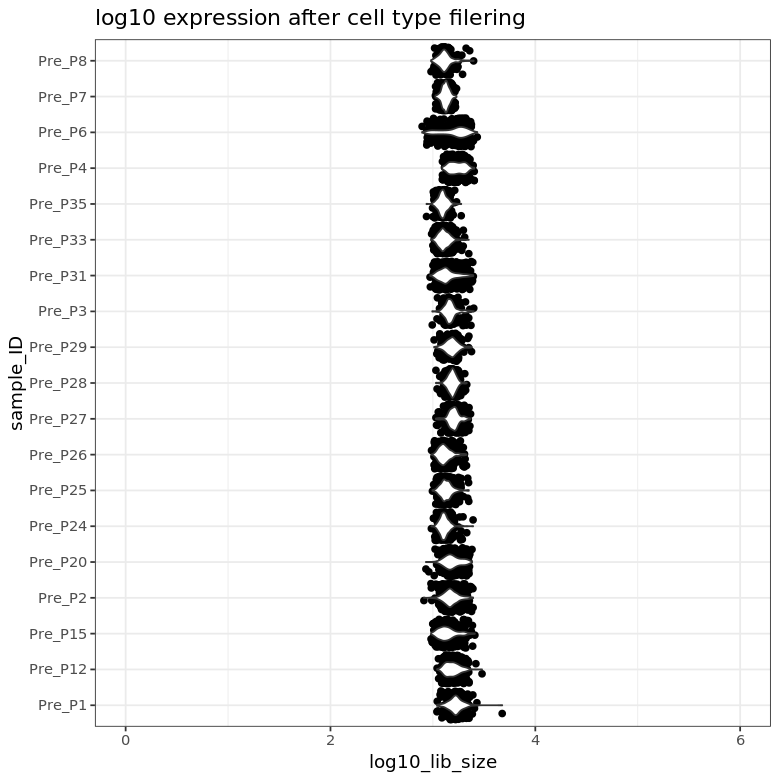

In [44]:
ggplot(data = df
             ,aes(x = sample_ID
                  ,y = log10_lib_size
             )
) +
        geom_jitter(height = NULL) +
        geom_violin() + 
        ggtitle("log10 expression after cell type filering") +
        coord_flip() +
        ylim(c(0,6))+
        theme_bw()

rm(df)

In [45]:
# create anno_samples_cf_ctf
anno_samples_cf_ctf <- anno_samples_cf

In [46]:
# save cell number in anno_samples
for(sample in unique(anno_cells_cf_ctf$sample_ID)){
        
        my_anno_cf <- anno_cells_cf_ctf[anno_cells_cf_ctf$sample_ID == sample,]
        
        anno_samples_cf_ctf$nr_cells_cf_ctf[anno_samples_cf_ctf$sample_ID == sample] <- nrow(my_anno_cf)
}
print("anno_samples_cf_ctf")
print(anno_samples_cf_ctf)

[1] "anno_samples_cf_ctf"
   patient_ID sample_ID response_status sampling_time gender age
1          P1    Pre_P1               R           pre      M  49
7         P12   Pre_P12              NR           pre      M  68
11        P15   Pre_P15              NR           pre      M  72
17         P2    Pre_P2              NR           pre      M  75
18        P20   Pre_P20              NR           pre      F  64
24        P24   Pre_P24               R           pre      M  73
25        P25   Pre_P25              NR           pre      M  74
26        P26   Pre_P26               R           pre      M  72
27        P27   Pre_P27              NR           pre      F  62
28        P28   Pre_P28               R           pre      F  67
30        P29   Pre_P29               R           pre      M  79
31         P3    Pre_P3              NR           pre      F  83
35        P31   Pre_P31              NR           pre      M  52
36        P33   Pre_P33               R           pre      F  65

In [47]:
# create anno_gene_cf_ctf
anno_genes_cf_ctf <- anno_genes_cf

### export

## Filter genes

Individual genes might be specific to certain cell types in certain health conditions. Here we will construct pseudo-bulk cell types (per sample) and filter out genes that have too low cumulative expression in these pseudo-bulks.

- **INPUT:**
    - ```counts_cf_ctf.RData``` 
    - ```anno_cells_cf_ctf.RData```
    - ```anno_samples_cf_ctf.RData```
    - ```anno_genes_cf_ctf.RData```
    - ```cell_relabelling.csv``` file containing unified cell type annotations. Stored in additional_input_files sub-directory.
    
    
- **NOTES:**

    The '_gf' ending in the file names stands for gene filter.
    
    
- **OUTPUT:**

    -  ```counts_cf_ctf_gf.RData```
    -  ```anno_cells_cf_ctf_gf.RData```
    -  ```anno_samples_cf_ctf_gf.RData```
    -  ```anno_genes_cf_ctf_gf.RData```

In [48]:
# thresholds
threshold_sum_pseudobulkCellType_expr <- 0.25
print(paste("threshold_sum_pseudobulkCellType_expr: >", threshold_sum_pseudobulkCellType_expr))

[1] "threshold_sum_pseudobulkCellType_expr: > 0.25"


### process data

In [49]:
# construct pseudo sorted bulk

anno_cells_cf_ctf$cell_type_ID <- paste(anno_cells_cf_ctf$cell_type
                                        ,anno_cells_cf_ctf$sample_ID
                                        ,sep = "_"
)

In [50]:
cell_type_IDs <- unique(anno_cells_cf_ctf$cell_type_ID)
counts_raw_pseudobulkCellType <- as.data.frame(matrix(,nrow = nrow(counts_cf_ctf)
                                                    ,ncol = length(cell_type_IDs)
))

i <- 1
for(cell_type_ID in cell_type_IDs){
        #print(cell_type_ID)
        
        idx_cell_type_ID <- anno_cells_cf_ctf$cell_type_ID == cell_type_ID
        
        if(sum(idx_cell_type_ID) == 0){
                counts_raw_pseudobulkCellType[,i] <- 0
        } else if( sum(idx_cell_type_ID) == 1){
                counts_raw_pseudobulkCellType[,i] <- counts_cf_ctf[,idx_cell_type_ID]
        } else {
                counts_raw_pseudobulkCellType[,i] <- rowMeans(counts_cf_ctf[,idx_cell_type_ID])
        }
        
        i <- i+1
}

colnames(counts_raw_pseudobulkCellType) <- cell_type_IDs
rownames(counts_raw_pseudobulkCellType) <- rownames(counts_cf_ctf)
cat("str(counts_raw_pseudobulkCellType\n\n)")
print(str(counts_raw_pseudobulkCellType))

str(counts_raw_pseudobulkCellType

)'data.frame':	50958 obs. of  225 variables:
 $ NK_Pre_P1          : num  0 0 0.35793 0.00254 0.01243 ...
 $ T CD8 naïve_Pre_P1 : num  0 0.000077 0.166043 0.031766 0.027775 ...
 $ T helper_Pre_P1    : num  0.00491 0.01428 0 0.02672 0.09787 ...
 $ Tfh_Pre_P1         : num  0 0 0 0 0 ...
 $ T reg act_Pre_P1   : num  0 0 0.49 0.041 0.294 ...
 $ DC_Pre_P1          : num  0 0 0.27644 0.07434 0.00893 ...
 $ T cycling_Pre_P1   : num  0 0 0.399 0.287 0.548 ...
 $ T CD4 naïve_Pre_P1 : num  0 0 0.136 0.1694 0.0259 ...
 $ T CD8 ex_Pre_P1    : num  0 0 0.3146 0 0.0533 ...
 $ T CD8 mem_Pre_P1   : num  0 0 0.547 0 0.252 ...
 $ Macrophage_Pre_P1  : num  0 0 0 0.0246 0 ...
 $ T reg act_Pre_P12  : num  0 0 0.1231 0.0734 0.1627 ...
 $ T CD8 mem_Pre_P12  : num  0 0 0.0386 0 0 ...
 $ T CD8 eff_Pre_P12  : num  0.000387 0.00025 0.045361 0.050348 0.005785 ...
 $ T CD8 ex_Pre_P12   : num  0.000192 0.000123 0.095163 0.051853 0.028272 ...
 $ T CD4 naïve_Pre_P12: num  0.0012 0 

### visualize possible filtering parameters

In [51]:
nr_expressing_cell_types <- rowSums(counts_raw_pseudobulkCellType != 0)

anno_genes_cf_ctf$sum_pseudobulkCellType_expr = rowSums(as.matrix(counts_raw_pseudobulkCellType))
anno_genes_cf_ctf$sum_pseudobulkCellType_expr_threshold <- rep(threshold_sum_pseudobulkCellType_expr, nrow(anno_genes_cf_ctf))
anno_genes_cf_ctf$sum_pseudobulkCellType_expr_filter <- anno_genes_cf_ctf$sum_pseudobulkCellType_expr > threshold_sum_pseudobulkCellType_expr
print(str(anno_genes_cf_ctf))

'data.frame':	50958 obs. of  13 variables:
 $ gene_symbol                          : chr  "TSPAN6" "TNMD" "DPM1" "SCYL3" ...
 $ vst_mean                             : num  0.1874 0.0254 25.1239 11.7653 12.0984 ...
 $ vst_variance                         : num  55.62 1.71 5881.65 4097.14 4653.66 ...
 $ vst_variance_expected                : num  15.66 1.13 9646 3859.3 3994.57 ...
 $ vst_variance_standardized            : num  2.95 1.52 0.61 1.06 1.16 ...
 $ vst_variable                         : chr  "True" "False" "False" "False" ...
 $ highly_variable                      : chr  "False" "False" "False" "True" ...
 $ means                                : num  0.001669 0.000333 0.163605 0.073268 0.074602 ...
 $ dispersions                          : num  0.179 -0.664 0.186 0.365 0.274 ...
 $ dispersions_norm                     : num  0.899 0.14 -0.38 1.067 0.984 ...
 $ sum_pseudobulkCellType_expr          : num  0.1143 0.0246 25.6682 10.8324 13.2293 ...
 $ sum_pseudobulkCellType_expr_

In [52]:
print(paste("we have"
            ,nrow(counts_cf_ctf)
            ,"genes before filtering"
)
)
print(paste("we have"
            ,sum(anno_genes_cf_ctf$sum_pseudobulkCellType_expr_filter)
            ,"genes after filtering"
)
)

[1] "we have 50958 genes before filtering"
[1] "we have 25483 genes after filtering"


In [53]:
# plot sum expression vs nr expressing pseudobulk cell types
df <- data.frame(log10_sum_expr = log10(rowSums(as.matrix(counts_raw_pseudobulkCellType)) +1)
                 ,nr_expressing_pseudobulkCellTypes = nr_expressing_cell_types
                 ,passed_gene_filter = anno_genes_cf_ctf$sum_pseudobulkCellType_expr_filter
)


Warning message:
“Removed 11957 rows containing non-finite outside the scale range
(`stat_density2d()`).”
Warning message:
“Removed 11957 rows containing missing values or values outside the scale range
(`geom_point()`).”


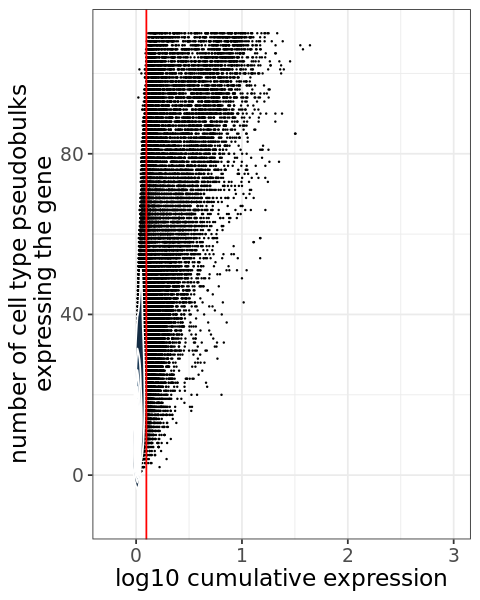

In [54]:
options(repr.plot.width = 4
       ,repr.plot.height = 5)
ggplot(data = df
             ,aes(x = log10_sum_expr
                  ,y = nr_expressing_pseudobulkCellTypes
             )
) +
geom_point(size = 0.05)+
ylim(c(-10,110))+
xlim(c(-0.25,3))+
ylab("number of cell type pseudobulks\nexpressing the gene")+
xlab("log10 cumulative expression")+
stat_density_2d(aes(fill = ..level..), geom = "polygon", colour="white"
               ,show.legend = FALSE) +
geom_vline(xintercept = log10(threshold_sum_pseudobulkCellType_expr+1), color = "red")+
theme_bw()+
theme(text = element_text(size = 14))

### filter genes

In [55]:
# filter genes by gene filter from the gene annotation file
counts_cf_ctf_gf <- counts_cf_ctf[anno_genes_cf_ctf$sum_pseudobulkCellType_expr_filter,]
print(dim(counts_cf_ctf_gf))

[1] 25483  5281


In [56]:
# filter gene annotation by gene filter from the gene annotation file
anno_genes_cf_ctf_gf <- anno_genes_cf_ctf[anno_genes_cf_ctf$sum_pseudobulkCellType_expr_filter,]

In [57]:
# store total counts per cell after gene filtering in the cell annotation file
anno_cells_cf_ctf_gf <- anno_cells_cf_ctf
anno_cells_cf_ctf_gf$total_counts_raw_cf_ctf_gf <- colSums(counts_cf_ctf_gf)

In [58]:
anno_samples_cf_ctf_gf <- anno_samples_cf_ctf

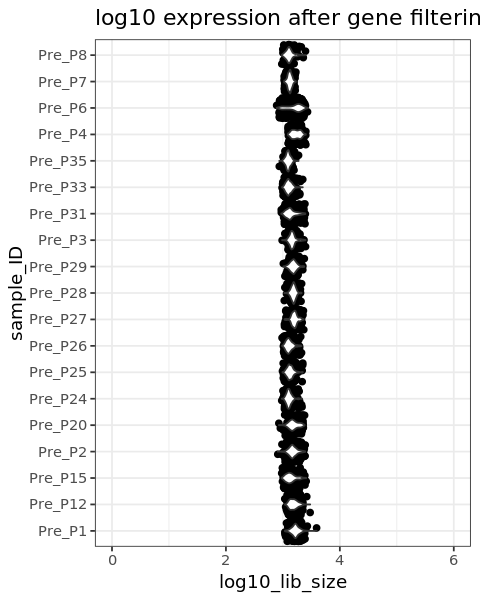

In [59]:
# visualize the expression after gene filter
df <- data.frame(log10_lib_size = log10(anno_cells_cf_ctf_gf$total_counts_raw_cf_ctf_gf +1)
                 ,sample_ID = anno_cells_cf_ctf_gf$sample_ID
)

ggplot(data = df
             ,aes(x = sample_ID
                  ,y = log10_lib_size
             )
) +
        geom_jitter(height = NULL) +
        geom_violin() + 
        ggtitle("log10 expression after gene filtering") +
        coord_flip() +
        ylim(c(0,6))+
        theme_bw()

rm(df)

### export

In [60]:
# #save counts_cf_ctf_gf.RData
# save(counts_cf_ctf_gf, file = "counts_cf_ctf_gf.RData")

# #save anno_cells_cf_ctf_gf.RData
# save(anno_cells_cf_ctf_gf, file = "anno_cells_cf_ctf_gf.RData")

# #save anno_samples_cf_ctf_gf.RData
# save(anno_samples_cf_ctf_gf, file = "anno_samples_cf_ctf_gf.RData")
# 3
# #save anno_genes_cf_ctf_gf.RData
# save(anno_genes_cf_ctf_gf, file = "anno_genes_cf_ctf_gf.RData")

## Filter samples

Samples with less than 5 cell types will be filtered out.

- **INPUT:**
    - ```counts_cf_ctf_gf.RData``` 
    - ```anno_cells_cf_ctf_gf.RData```
    - ```anno_samples_cf_ctf_gf.RData```
    - ```anno_genes_cf_ctf_gf.RData```
    
- **NOTES:**

    The '_sf' ending in the file names stands for sample filter.
    
- **OUTPUT:**

    -  ```counts_cf_ctf_gf_sf.RData``` 
    -  ```anno_cells_cf_ctf_gf_sf.RData``` 
    -  ```anno_samples_cf_ctf_gf_sf.RData```
    -  ```anno_genes_cf_ctf_gf_sf.RData```

In [61]:
# print("load counts")
# load("./AML_healthy/counts_cf_ctf_gf.RData")
# print("dim(counts_cf_ctf_gf)")
# print(dim(counts_cf_ctf_gf))

# # load cell annotation
# print("load cell annotation")
# load("./AML_healthy/anno_cells_cf_ctf_gf.RData")
# print("str(anno_cells_cf_ctf_gf)")
# print(str(anno_cells_cf_ctf_gf))

# # load sample annotation
# print("load sample annotation")
# load("./AML_healthy/anno_samples_cf_ctf_gf.RData")
# print("str(anno_samples_cf_ctf_gf)")
# print(str(anno_samples_cf_ctf_gf))

# # load gene annotation
# print("load gene annotation")
# load("./AML_healthy/anno_genes_cf_ctf_gf.RData")
# print("str(anno_genes_cf_ctf_gf)")
# print(str(anno_genes_cf_ctf_gf))

In [62]:
# check the coverage of the cell types

library("circlize")
library("ComplexHeatmap")

plot_cell_numbers <- function(anno_cells
                             ,cell_type_column
                             ,color_samples){
    df <- table(data.frame(sample_ID = anno_cells$sample_ID
                       ,cell_type = anno_cells[,cell_type_column])
            )
df <- t(matrix(df
               ,ncol = ncol(df)
               ,dimnames=dimnames(df)
               )
        )

col_fun = colorRamp2(c(0
                       ,4#10
                       ,100
                       ,500
                       #,1000
                       , max(df)), c("white"
                                     #,"lightgoldenrod1"
                                     #,"gold"
                                     ,"#CFCFCF"
                                     ,"#BFBFBF"
                                     #,"#A1A1A1"
                                     ,"salmon"
                                     , "darkred"))
Heatmap(df
        ,cluster_columns = FALSE
        ,col = col_fun
        ,name="nr cells"
        ,show_heatmap_legend = FALSE
        ,column_names_gp = gpar(col = col_samples)
        ,cell_fun = function(j, i, x, y, width, height, fill) {
                grid.text(as.character(df[i, j])
                          , x
                          , y
                          , gp = gpar(fontsize = 12
                                      )
                          ,rot=90
                          )
                }
        )
}

col_samples <- sapply(anno_samples_cf_ctf_gf$case_or_control ## add to object; create column with "case" and "control"
                              ,function(i){
                                      ifelse(grepl("case"
                                                   ,i)
                                             ,"#7C001F"
                                             ,"#7AC5CD"
                                      )
                              })

Warning message:
“package ‘circlize’ was built under R version 4.1.3”
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps 

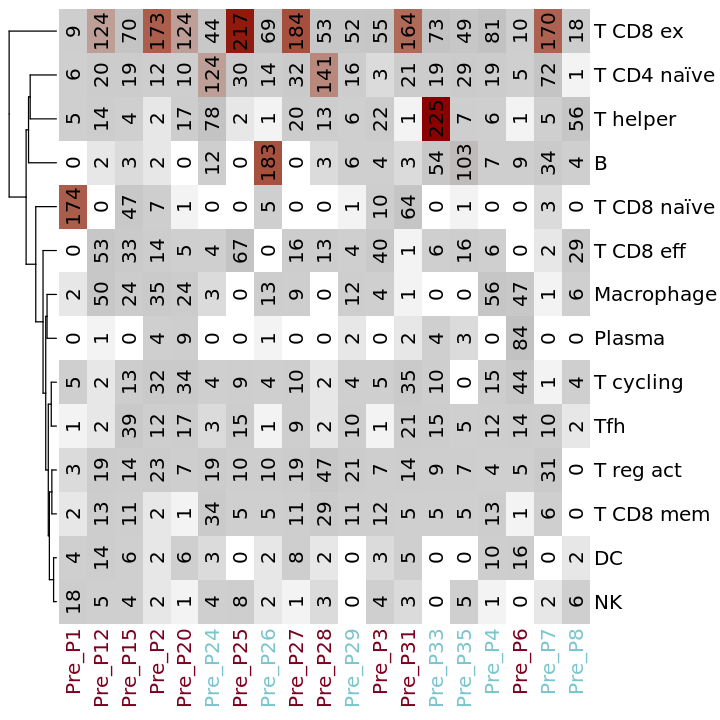

In [63]:
options(repr.plot.width = 6
      ,repr.plot.height = 6)

plot_cell_numbers(anno_cells_cf_ctf_gf
                 ,"cell_type"
                 ,col_samples)

In [64]:
# thresholds ####
threshold_nr_celltypes <- 7
print(paste("A sample should contain at least"
            ,threshold_nr_celltypes
            ,"cell types"))

[1] "A sample should contain at least 7 cell types"


### filter

In [65]:
# filter out samples that are not present in the cell annotation
print(dim(anno_samples_cf_ctf_gf))
anno_samples_cf_ctf_gf <- anno_samples_cf_ctf_gf[anno_samples_cf_ctf_gf$sample_ID %in% unique(anno_cells_cf_ctf_gf$sample_ID),]
print(dim(anno_samples_cf_ctf_gf))

[1] 19 20
[1] 19 20


In [66]:
rownames(anno_samples_cf_ctf_gf) <- anno_samples_cf_ctf_gf$sample_ID
anno_samples_cf_ctf_gf <- anno_samples_cf_ctf_gf[unique(anno_cells_cf_ctf_gf$sample_ID),]
print(dim(anno_samples_cf_ctf_gf))

[1] 19 20


In [67]:
# store total counts per sample after gene filtering in the sample annotation file
anno_samples_cf_ctf_gf$total_counts_raw_cf_ctf_gf <- sapply(unique(anno_cells_cf_ctf_gf$sample_ID)
                                                         ,function(sample){
                                                             #print(sample)
                                                                 idx_sample <- anno_cells_cf_ctf_gf$sample_ID == sample
                                                             #print(sum(idx_sample))
                                                                 sum(anno_cells_cf_ctf_gf$total_counts_raw_cf_ctf_gf[idx_sample])
                                                         })

In [68]:
# store number of cell types per sample after gene filtering in the sample annotation file
anno_samples_cf_ctf_gf$nr_celltypes_cf_ctf_gf <- sapply(anno_samples_cf_ctf_gf$sample_ID
                                                         ,function(sample){
                                                                 idx_sample <- anno_cells_cf_ctf_gf$sample_ID == sample
                                                                 length(unique(anno_cells_cf_ctf_gf$cell_type[idx_sample]))
                                                         })

In [69]:
anno_samples_cf_ctf_gf$threshold_nr_celltypes <- paste("greater or equal"
                                              ,threshold_nr_celltypes)
anno_samples_cf_ctf_gf$passed_threshold_nr_celltypes <- anno_samples_cf_ctf_gf$nr_celltypes_cf_ctf_gf >= threshold_nr_celltypes


In [70]:
print(paste("we have"
            ,sum(anno_samples_cf_ctf_gf$passed_threshold_nr_celltypes)
            ,"samples that passed the threshold"))
print(paste("we have"
            ,sum(!anno_samples_cf_ctf_gf$passed_threshold_nr_celltypes)
            ,"samples that didn't pass the threshold:"))

[1] "we have 19 samples that passed the threshold"
[1] "we have 0 samples that didn't pass the threshold:"


In [71]:
bad_samples <- anno_samples_cf_ctf_gf$sample_ID[!anno_samples_cf_ctf_gf$passed_threshold_nr_celltypes]
print(bad_samples)

character(0)


### visualization

In [72]:
color_samples <- sapply(anno_samples_cf_ctf_gf$sample_ID, function(s){
    idx_s <- anno_samples_cf_ctf_gf$sample_ID == s
    ifelse(anno_samples_cf_ctf_gf$case_or_control[idx_s] == "case","#7C001F","#7ac5cd")
})

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's size values.”


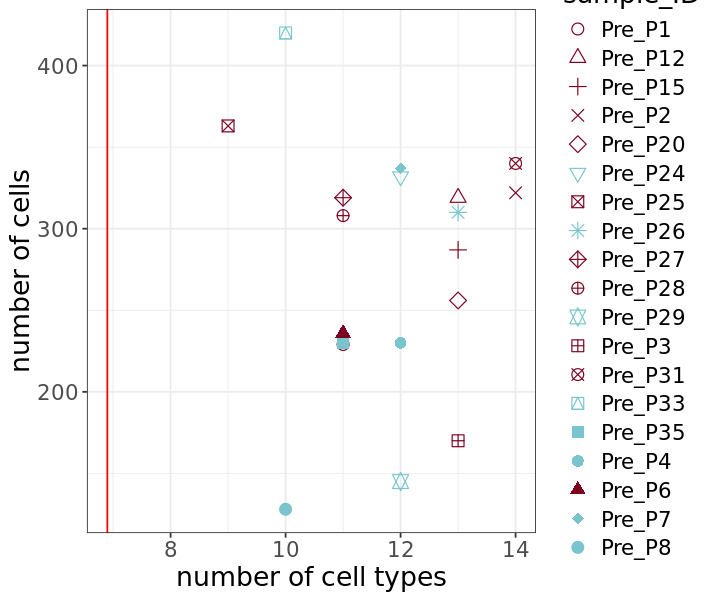

In [73]:
options(repr.plot.width = 6
       ,repr.plot.height = 5)

ggplot(data = anno_samples_cf_ctf_gf
       ,aes(x = nr_celltypes_cf_ctf_gf
            ,y = nr_cells_cf_ctf
            ,color = sample_ID
            ,shape = sample_ID
            ,size = sample_ID
       )
) +
geom_point(size = 3)+
geom_vline(xintercept = threshold_nr_celltypes- 0.1
           ,color = "red")+
scale_color_manual(values = color_samples)+
scale_shape_manual(values=shape_sample)+
scale_size_manual(values=size_sample)+
xlab("number of cell types")+
ylab("number of cells")+
theme_bw()+
theme(text = element_text(size = 16))

In [74]:
#subset anno_anno_samples_cf_ctf_gf

print("dim(anno_samples_cf_ctf_gf) before filtering")
print(dim(anno_samples_cf_ctf_gf))
anno_samples_cf_ctf_gf_sf <- anno_samples_cf_ctf_gf[anno_samples_cf_ctf_gf$passed_threshold_nr_celltypes,]
print("dim(anno_samples_cf_ctf_gf_sf) after filtering")
print(dim(anno_samples_cf_ctf_gf_sf))

[1] "dim(anno_samples_cf_ctf_gf) before filtering"
[1] 19 24
[1] "dim(anno_samples_cf_ctf_gf_sf) after filtering"
[1] 19 24


In [75]:
#subset anno_cells

print("dim(anno_cells_cf_ctf_gf) before filtering")
print(dim(anno_cells_cf_ctf_gf))
idx_bad <- anno_cells_cf_ctf_gf$sample_ID %in% bad_samples
anno_cells_cf_ctf_gf_sf <- anno_cells_cf_ctf_gf[!idx_bad,]
print("dim(anno_cells_cf_ctf_gf_sf) after filtering")
print(dim(anno_cells_cf_ctf_gf_sf))

[1] "dim(anno_cells_cf_ctf_gf) before filtering"
[1] 5281   50
[1] "dim(anno_cells_cf_ctf_gf_sf) after filtering"
[1] 5281   50


In [76]:
#subset counts_cf_ctf_gf

print("dim(counts_cf_ctf_gf) before filtering")
print(dim(counts_cf_ctf_gf))
counts_cf_ctf_gf_sf <- counts_cf_ctf_gf[,!idx_bad]
print("dim(counts_cf_ctf_gf_sf) after filtering")
print(dim(counts_cf_ctf_gf_sf))

[1] "dim(counts_cf_ctf_gf) before filtering"
[1] 25483  5281
[1] "dim(counts_cf_ctf_gf_sf) after filtering"
[1] 25483  5281


In [77]:
anno_cells_cf_ctf_gf_sf$total_counts_raw_cf_ctf_gf_sf <- colSums(counts_cf_ctf_gf_sf)

anno_genes_cf_ctf_gf_sf <- anno_genes_cf_ctf_gf

In [78]:
# visualize expression after sample filter

df <- data.frame(log10_lib_size = log10(anno_cells_cf_ctf_gf_sf$total_counts_raw_cf_ctf_gf_sf +1)
                 ,sample_ID = anno_cells_cf_ctf_gf_sf$sample_ID
)
print(str(df))

'data.frame':	5281 obs. of  2 variables:
 $ log10_lib_size: num  3.17 3.12 3.12 3.29 3.06 ...
 $ sample_ID     : chr  "Pre_P1" "Pre_P1" "Pre_P1" "Pre_P1" ...
NULL


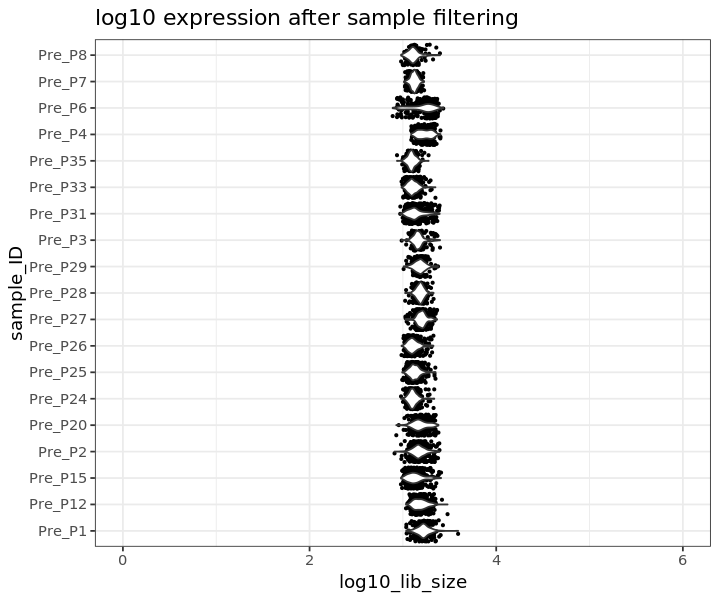

In [79]:
ggplot(data = df
             ,aes(x = sample_ID
                  ,y = log10_lib_size
             )
) +
        geom_jitter(height = NULL
                    ,size = 0.5) +
        geom_violin() + 
        ggtitle("log10 expression after sample filtering") +
        coord_flip() +
        ylim(c(0,6))+
        theme_bw()

rm(df)

### heatmap

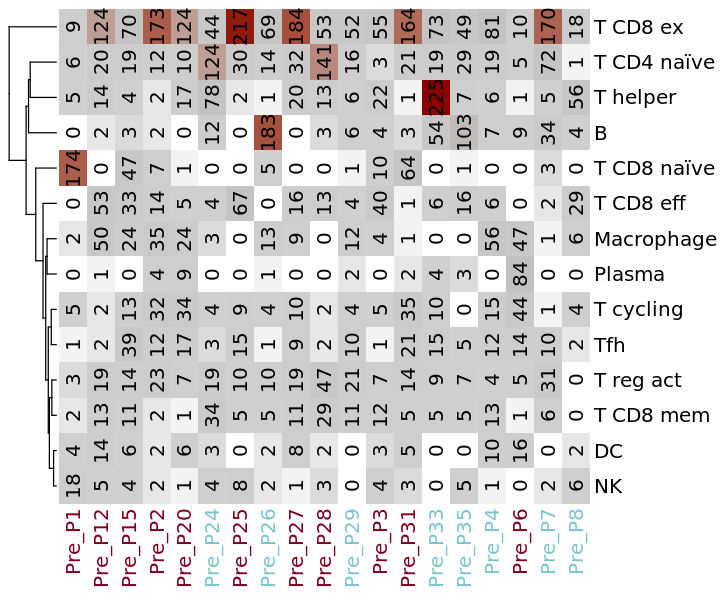

In [80]:
col_samples <- sapply(anno_samples_cf_ctf_gf_sf$case_or_control ## add to object; create column with "case" and "control"
                              ,function(i){
                                      ifelse(grepl("case"
                                                   ,i)
                                             ,"#7C001F"
                                             ,"#7AC5CD"
                                      )
                              })
plot_cell_numbers(anno_cells_cf_ctf_gf_sf
                 ,"cell_type"
                 ,col_samples)

### library size by cell type

In [81]:
cell_type_IDs <- unique(anno_cells_cf_ctf_gf_sf$cell_type_ID)
counts_filtered_pseudobulkCellType <- as.data.frame(matrix(,nrow = nrow(counts_cf_ctf_gf_sf)
                                                    ,ncol = length(cell_type_IDs)
))

i <- 1
for(cell_type_ID in cell_type_IDs){
        
        idx_cell_type_ID <- anno_cells_cf_ctf_gf_sf$cell_type_ID == cell_type_ID
        
        if(sum(idx_cell_type_ID) == 0){
                counts_filtered_pseudobulkCellType[,i] <- 0
        } else if( sum(idx_cell_type_ID) == 1){
                counts_filtered_pseudobulkCellType[,i] <- counts_cf_ctf_gf_sf[,idx_cell_type_ID]
        } else {
                counts_filtered_pseudobulkCellType[,i] <- rowMeans(counts_cf_ctf_gf_sf[,idx_cell_type_ID])
        }
        
        i <- i+1
}

colnames(counts_filtered_pseudobulkCellType) <- cell_type_IDs
rownames(counts_filtered_pseudobulkCellType) <- rownames(counts_cf_ctf_gf_sf)
cat("str(counts_filtered_pseudobulkCellType\n\n)")
print(str(counts_filtered_pseudobulkCellType))

str(counts_filtered_pseudobulkCellType

)'data.frame':	25483 obs. of  225 variables:
 $ NK_Pre_P1          : num  0.35793 0.00254 0.01243 0.214 0 ...
 $ T CD8 naïve_Pre_P1 : num  0.166 0.0318 0.0278 0.0265 0.0142 ...
 $ T helper_Pre_P1    : num  0 0.0267 0.0979 0 0.0377 ...
 $ Tfh_Pre_P1         : num  0 0 0 0 0 ...
 $ T reg act_Pre_P1   : num  0.49 0.041 0.294 0 0 ...
 $ DC_Pre_P1          : num  0.27644 0.07434 0.00893 0 0 ...
 $ T cycling_Pre_P1   : num  0.39878 0.28698 0.54761 0 0.00352 ...
 $ T CD4 naïve_Pre_P1 : num  0.13602 0.16942 0.02587 0.00225 0 ...
 $ T CD8 ex_Pre_P1    : num  0.3146 0 0.0533 0 0 ...
 $ T CD8 mem_Pre_P1   : num  0.547 0 0.252 0 0 ...
 $ Macrophage_Pre_P1  : num  0 0.0246 0 0.9879 0 ...
 $ T reg act_Pre_P12  : num  0.12306 0.07335 0.16275 0.00122 0.05094 ...
 $ T CD8 mem_Pre_P12  : num  0.0386 0 0 0.3087 0.0556 ...
 $ T CD8 eff_Pre_P12  : num  0.04536 0.05035 0.00578 0.32524 0.0072 ...
 $ T CD8 ex_Pre_P12   : num  0.0952 0.0519 0.0283 0.1007 0.0238 ...
 $ T 

In [82]:
# visualize expression in pseudo sorted bulk

my_sampes <- sub("_.*", "", colnames(counts_filtered_pseudobulkCellType))
df <- data.frame(log10_lib_size = log10(colSums(counts_filtered_pseudobulkCellType) +1)
                 ,sample_ID = sub(".*_"
                                  ,""
                                  ,colnames(counts_filtered_pseudobulkCellType)
                 )
                 ,cell_type = sub("_.*"
                                   ,""
                                   ,colnames(counts_filtered_pseudobulkCellType)
                 )
)

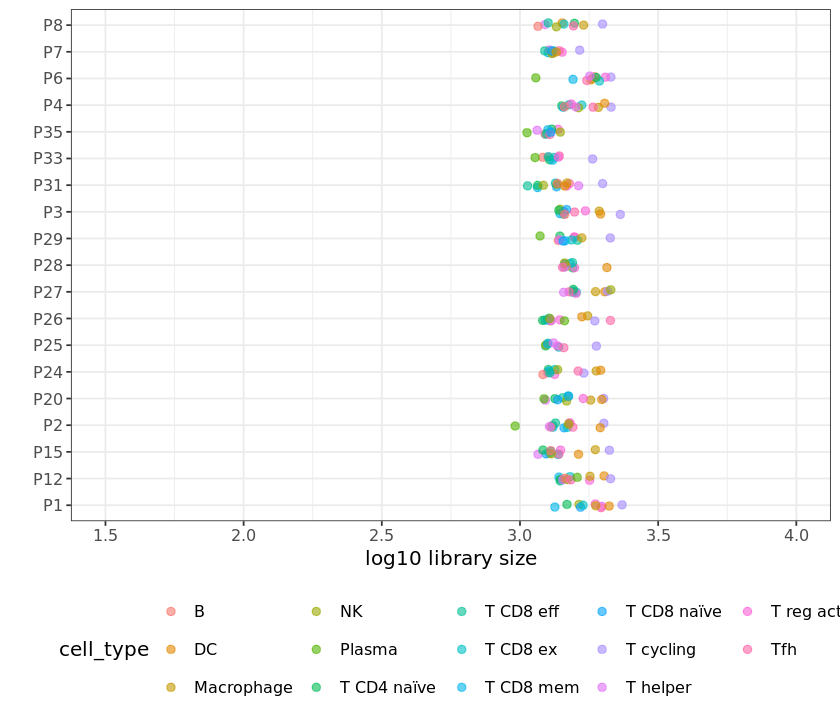

In [83]:
options(repr.plot.width=7
        , repr.plot.height=6) 
ggplot(data = df
             ,aes(y = sample_ID
                  ,x = log10_lib_size
                  ,color = cell_type
             )
) +
geom_jitter(height = 0.1
            ,width = 0
            ,alpha = 0.6
           ,size =2) +
xlim(c(1.5,4))+
ylab("")+
#scale_color_manual(values = color_celltype
#                  ,name = "")+
theme_bw()+
xlab("log10 library size")+
theme(text = element_text(size = 12)
     ,legend.position = "bottom")

In [84]:
str(anno_genes_cf_ctf_gf_sf)

'data.frame':	25483 obs. of  13 variables:
 $ gene_symbol                          : chr  "DPM1" "SCYL3" "C1orf112" "FGR" ...
 $ vst_mean                             : num  25.12 11.77 12.1 55.5 1.63 ...
 $ vst_variance                         : num  5882 4097 4654 56703 771 ...
 $ vst_variance_expected                : num  9646 3859 3995 24691 294 ...
 $ vst_variance_standardized            : num  0.61 1.06 1.16 2.3 2.62 ...
 $ vst_variable                         : chr  "False" "False" "False" "False" ...
 $ highly_variable                      : chr  "False" "True" "True" "True" ...
 $ means                                : num  0.1636 0.07327 0.0746 0.17861 0.00976 ...
 $ dispersions                          : num  0.186 0.365 0.274 0.721 0.496 ...
 $ dispersions_norm                     : num  -0.38 1.067 0.984 1.489 1.184 ...
 $ sum_pseudobulkCellType_expr          : num  25.67 10.83 13.23 31.59 1.08 ...
 $ sum_pseudobulkCellType_expr_threshold: num  0.25 0.25 0.25 0.25 0.25 0.2

### export

Since the data is already normalized, we will export it with the tag "norm"

In [85]:
dim(counts_cf_ctf_gf_sf)

[1] 25483  5281

In [86]:
dim(anno_cells_cf_ctf_gf_sf)

[1] 5281   51

In [87]:
dir.create('outs')

Warning message in dir.create("outs"):
“'outs' already exists”


In [88]:
write.table(data.frame("gene_symbol"=rownames(counts_cf_ctf_gf_sf),counts_cf_ctf_gf_sf),
            gzfile("outs/counts_lognorm.csv.gz"), row.names=FALSE)

In [89]:
# save counts
library(Matrix)
writeMM(obj = Matrix(as.matrix(counts_cf_ctf_gf_sf)
                     , sparse=TRUE)
        , file = "outs/counts_norm.mtx"
        )

# export anno_cells
write.table(anno_cells_cf_ctf_gf_sf
            ,file = "outs/anno_cells_norm.txt"
             ,sep = "\t"
            ,row.names = FALSE )


# export anno_genes
write.table(anno_genes_cf_ctf_gf_sf
            ,file = "outs/anno_genes_norm.txt"
            ,sep = "\t"
            ,row.names = FALSE
)

# export anno_samples
write.table(anno_samples_cf_ctf_gf_sf
            ,file = "outs/anno_samples_norm.txt"
            ,sep = "\t"
            ,row.names = FALSE
)

Warning message:
“package ‘Matrix’ was built under R version 4.1.3”


NULL

In [90]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/msolovey/miniconda3/envs/community_paper/lib/libopenblasp-r0.3.27.so

locale:
 [1] LC_CTYPE=de_DE.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] Matrix_1.5-4.1        ComplexHeatmap_2.10.0 circlize_0.4.15      
[4] ggplot2_3.5.1        

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-9        shape_1.4.6         GetoptLong_1.0.5   
 [4] tidyselect_1.2.1    repr_1.1.6          lattice_0.21-8     
 [7] c